# Hybrid Control Car


# 1 Setup

In [1]:
import hybrid_control_car as hcc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# np.set_printoptions(precision=3)

hz = 100 # Simulation steps per second
dt = 0.01 # Seconds per simulation timestep
units_per_meter = 100 # 1 unit = 1 cm
nstates = 7 # Number of states in the system

params = {
    'm': 0.5, # kg
    'hw': 0.3, # m
    'hh': 0.15, # m
    'dt': dt,
    'l': units_per_meter,
    'zeta': 0.8
}

config = hcc.SimulationConfig()

config.dt = dt
config.units_per_meter = units_per_meter
config.chassis_mass = 0.5 # kg
config.chassis_width = 0.6
config.chassis_height = 0.3
config.wheel_mass = 0.1 # kg
config.axle_mass = 0.1 # kg
config.max_steering_angle = 0.7 # radians

print(0.3/2)
print((0.3/2.0)/4.0)

0.15
0.0375


In [2]:
def plot_response(t, states, inputs, plot_y=False):
    x = states[:, 0]
    y = states[:, 1]
    z = states[:, 2]
    nx = states[:, 3]
    nz = states[:, 4]
    v = states[:, 5]
    w = states[:, 6]

    Fe = inputs[:, 0]
    theta = inputs[:, 1]

    fig, axs = plt.subplots(3, 2, sharex=True, figsize = (12, 12))
    axs = axs.flatten()

    axs[0].plot(t, x, label='$x$')
    axs[0].plot(t, z, label='$z$')

    if plot_y:
        axs[0].plot(t, y, label='$y$')

    axs[0].set_title("Position Response")
    axs[0].set_ylabel("position (m)")
    axs[0].legend()

    axs[1].plot(t, v)
    axs[1].set_title("Forwards Speed Response")
    axs[1].set_ylabel("speed (m/s)")

    axs[2].plot(t, nx, label='$n_x$')
    axs[2].plot(t, nz, label='$n_z$')
    axs[2].set_title("Forwards Vector vs. Time")
    axs[2].set_ylabel("size")
    axs[2].legend()

    axs[3].plot(t, w)
    axs[3].set_title("Angular Velocity Response")
    axs[3].set_ylabel("angular velocity (rad/s)")

    axs[4].plot(t, theta, label=r"$\theta$")
    axs[4].set_title("Steering Angle Input")
    axs[4].set_xlabel("time (s)")
    axs[4].set_ylabel("angle (rad)")

    axs[5].plot(t, Fe)
    axs[5].set_title("Engine Force Input")
    axs[5].set_xlabel("time (s)")
    axs[5].set_ylabel("force (kN)")

First, lets make sure the car doesn't move when the engine force is 0.

In [3]:
def simulate_response(initial_state, inputs, nsteps, nstates, config: hcc.SimulationConfig):
    env = hcc.SimulationEnvironment(config)
    states = np.zeros((nsteps, nstates))
    states[0, :] = initial_state

    for t in range(0, nsteps - 1):
        x0 = states[t, :]
        u = inputs[t, :]
        # x = hcc.simulate(x0, u, params)
        x = env.step(x0, u)
        x = np.array(x)
        states[t + 1, :] = x
    
    return states

0.03148632012618888


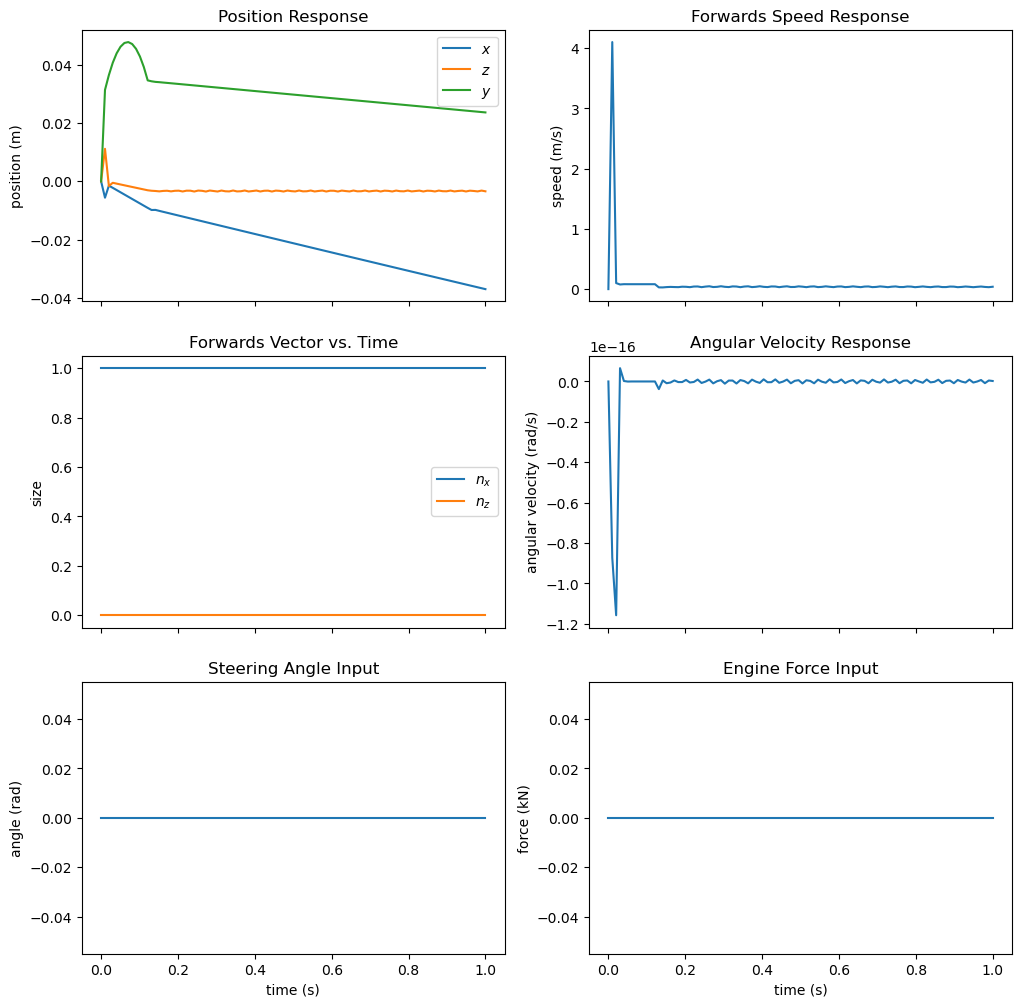

In [5]:
tf_debug = 1
nsteps_debug = tf_debug*hz
debug_inputs1 = np.vstack((
    0.0*np.ones(nsteps_debug),
    0.0*np.ones(nsteps_debug)
)).T
phi0 = 0
x0 = np.array([0.0, 0.0, 0.0, np.cos(phi0), np.sin(phi0), 0.0, 0.0])
debug_states1 = simulate_response(x0, debug_inputs1, nsteps_debug, nstates, config)
t_debug = np.linspace(0, tf_debug, nsteps_debug)

plot_response(t_debug, debug_states1, debug_inputs1, plot_y=True)

print(debug_states1[1, 1])

Everything looks good, the car stays in place as expected.

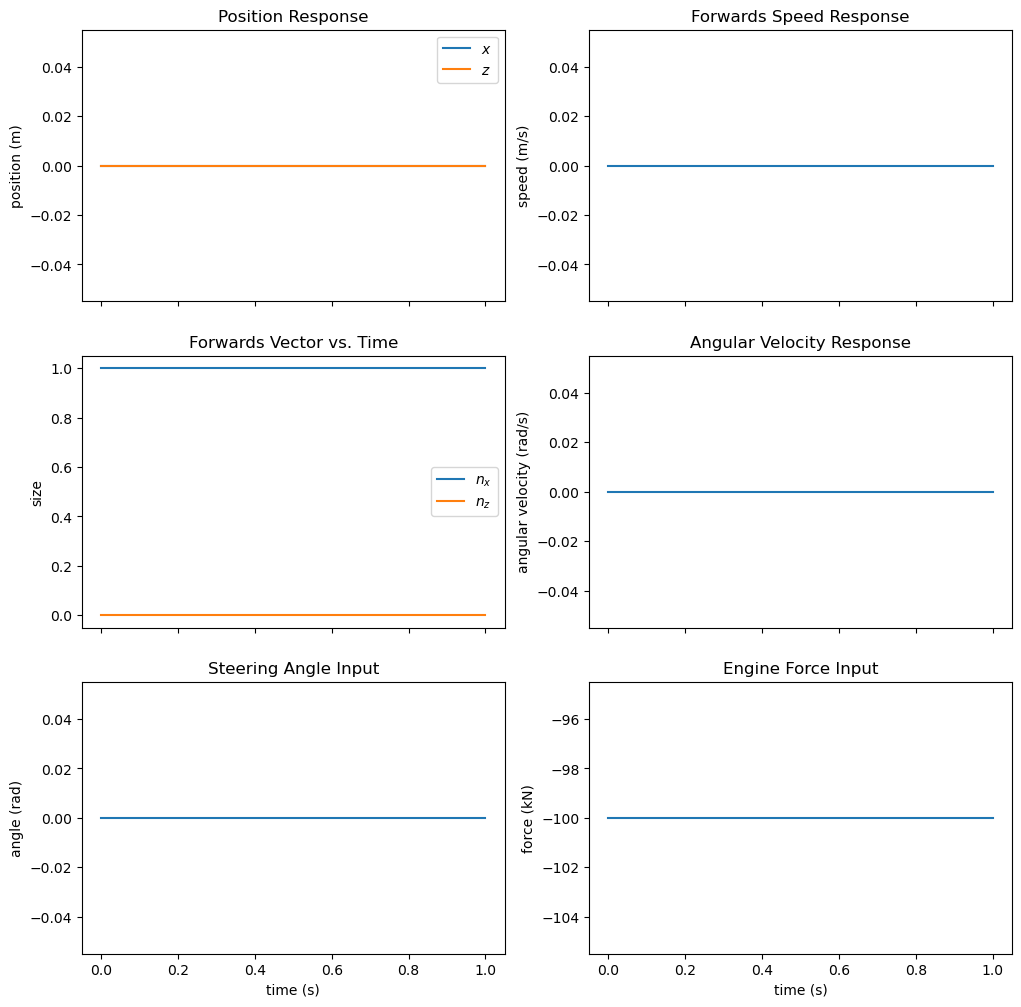

In [ ]:
tf_debug = 1
nsteps_debug = tf_debug*hz
debug_inputs2 = np.vstack((
    -100.0*np.ones(nsteps_debug),
    0.0*np.ones(nsteps_debug)
)).T
phi0 = 0
initial_state = np.array([0.0, 0.0, np.cos(phi0), np.sin(phi0), 0.0, 0.0])
debug_states2 = simulate_response(initial_state, debug_inputs2, nsteps_debug, nstates, config)
t_debug = np.linspace(0, tf_debug, nsteps_debug)

plot_response(t_debug, debug_states2, debug_inputs2)

In [ ]:
x_true = debug_states2[0, 0]

for t in range(hz):
    v = debug_states2[t, 4]
    x_true += v*dt

print(x_true)
# print(debug_states2[hz, 0])

0.0


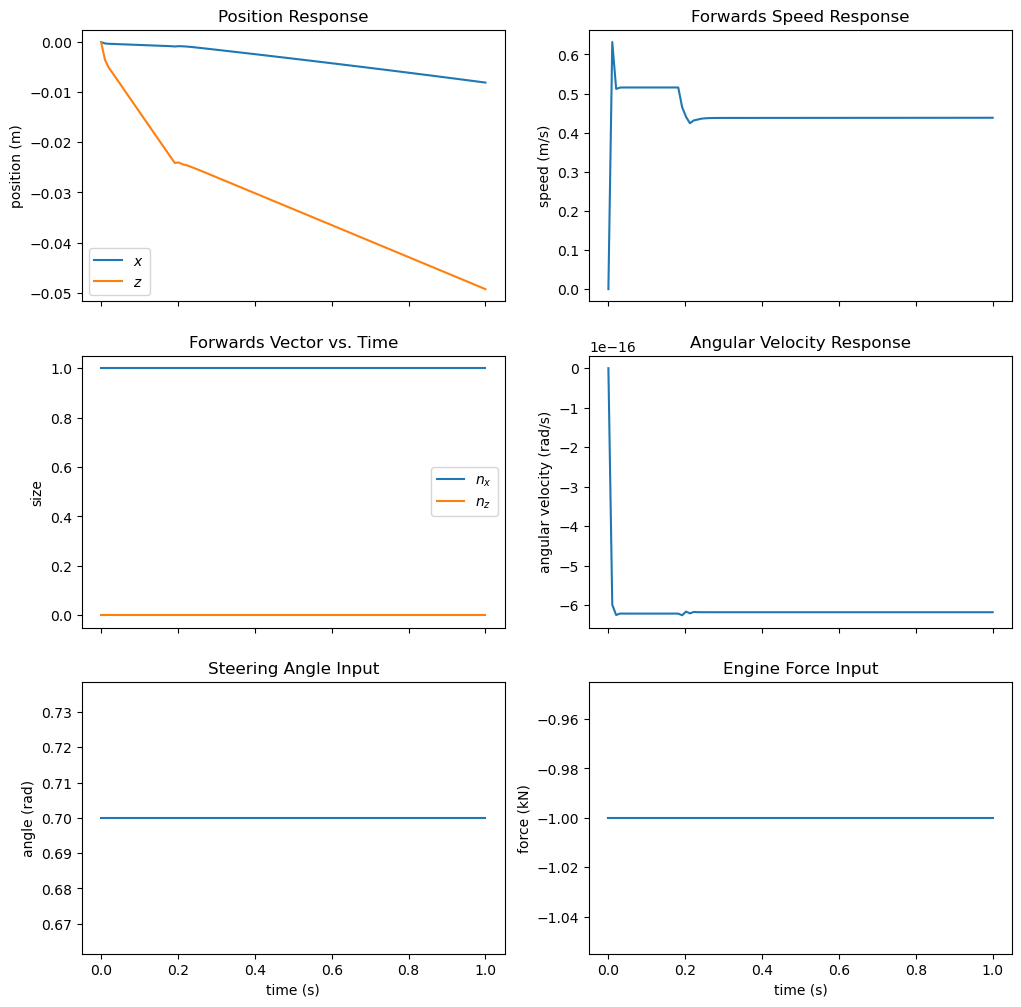

In [ ]:
debug_inputs3 = np.vstack((
    -1.0*np.ones(nsteps_debug),
    0.7*np.ones(nsteps_debug)
)).T
phi0 = 0
initial_state = np.array([0.0, 0.0, np.cos(phi0), np.sin(phi0), 0.0, 0.0])
debug_states3 = simulate_response(initial_state, debug_inputs3, nsteps_debug, nstates, config)
t_debug = np.linspace(0, tf_debug, nsteps_debug)

plot_response(t_debug, debug_states3, debug_inputs3)